# loading data from my drive

In [ ]:
#open google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
#connect to my drive
import pandas as pd
os.chdir('/content/drive/MyDrive')

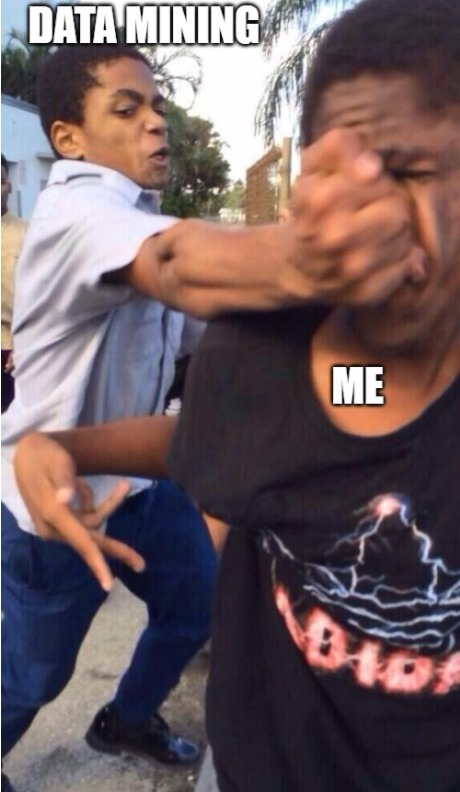

In [ ]:
#load the train data
df = pd.read_csv('train_new.csv')
df


,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,M,50,Livraison standard,3,0,30,50,NaN,NaN,CN,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,L,50,Livraison standard,3,0,37,50,NaN,NaN,CN,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,L,50,Livraison standard,2,0,41,50,NaN,NaN,CN,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,XS,5,Livraison standard,1,0,25,50,NaN,NaN,CN,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,0,"Summer,Floral print,women dresses,fashion dres...",apricot,S,50,Livraison standard,3,0,15,50,1.0,Quantité limitée !,CN,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,EUR,10000,0,4.0,2150,0,0,0,0,"corset top,Fashion,crop top,camisole,knittop,T...",red,S,50,Livraison standard,1,0,41,50,NaN,NaN,CN,fantastic_tune,fantastic_tune,"92 % avis positifs (230,951 notes)",230951,4.311066,53f2db3c104dae6bcae0c271,0,NaN,summer,2020-08,1381
1090,5.00,5,EUR,1000,0,5.0,377,1,0,1,0,"Blues,Summer,luggagesticker,Bicycle,cute,fresh...",NaN,H01,31,Livraison standard,2,0,35,50,NaN,NaN,CN,zzbllss,zzbllss,"(2,904 notes)",2904,4.422521,592968ba63950d682ca4b195,0,NaN,summer,2020-08,212
1091,9.00,48,EUR,1000,1,4.0,135,0,0,0,0,"Summer,Vest,Fashion,Tank,camisole,Halter,Beaut...",purple,M,50,Livraison standard,3,0,25,50,NaN,NaN,CN,OIUG 56465,oiug56465,"78 % avis positifs (6,632 notes)",6632,3.748794,5b6ec2f2838d931d2fbf7a28,0,NaN,summer,2020-08,163
1092,11.00,10,EUR,10000,1,4.0,1479,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,letter pri...",black,M,50,Livraison standard,2,0,45,50,1.0,Quantité limitée !,CN,yubenqiang,yubenqiang,"83 % avis positifs (5,816 notes)",5816,3.936382,58330d7def56284f7634e5e5,0,NaN,summer,2020-08,674


# displaying the data


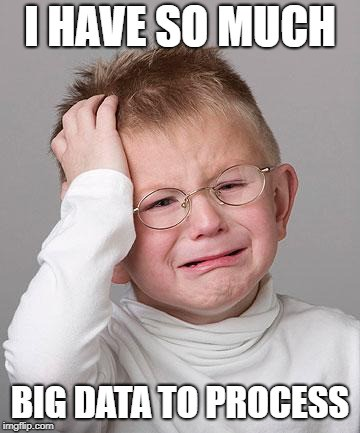

In [ ]:
#take an overview on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   currency_buyer                1094 non-null   object 
 3   units_sold                    1094 non-null   int64  
 4   uses_ad_boosts                1094 non-null   int64  
 5   rating                        1094 non-null   float64
 6   rating_count                  1094 non-null   int64  
 7   badges_count                  1094 non-null   int64  
 8   badge_local_product           1094 non-null   int64  
 9   badge_product_quality         1094 non-null   int64  
 10  badge_fast_shipping           1094 non-null   int64  
 11  tags                          1094 non-null   object 
 12  product_color                 1065 non-null   object 
 13  pro

show some details about the data

In [ ]:
#for more information about the data
df.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,349.0,1.094000e+03,1094.000000,1094.000000,1094.000000
mean,8.320786,23.712066,4518.661792,0.432358,4.006399,915.523766,0.114260,0.019196,0.083181,0.011883,32.807130,2.344607,0.002742,40.484461,49.849177,1.0,2.678399e+04,4.036191,0.155393,772.207495
std,4.027448,31.802661,9825.608568,0.495630,0.585706,2037.561158,0.348461,0.137275,0.276282,0.108409,21.454655,1.044781,0.052318,20.196229,2.480687,0.0,8.616171e+04,0.200397,0.362445,453.784430
min,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,8.000000,1.000000,1.0,4.000000e+00,2.941176,0.000000,2.000000
25%,5.830000,7.000000,100.000000,0.000000,4.000000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.926000e+03,3.918464,0.000000,382.250000
50%,8.000000,10.000000,1000.000000,0.000000,4.000000,143.500000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,8.225000e+03,4.045170,0.000000,752.500000
75%,11.000000,26.000000,5000.000000,1.000000,4.000000,845.500000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.306200e+04,4.166826,0.000000,1166.500000
max,49.000000,252.000000,100000.000000,1.000000,6.000000,20744.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,4.577519,1.000000,1572.000000


show the histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc22ac81050>,
      dtype=object)

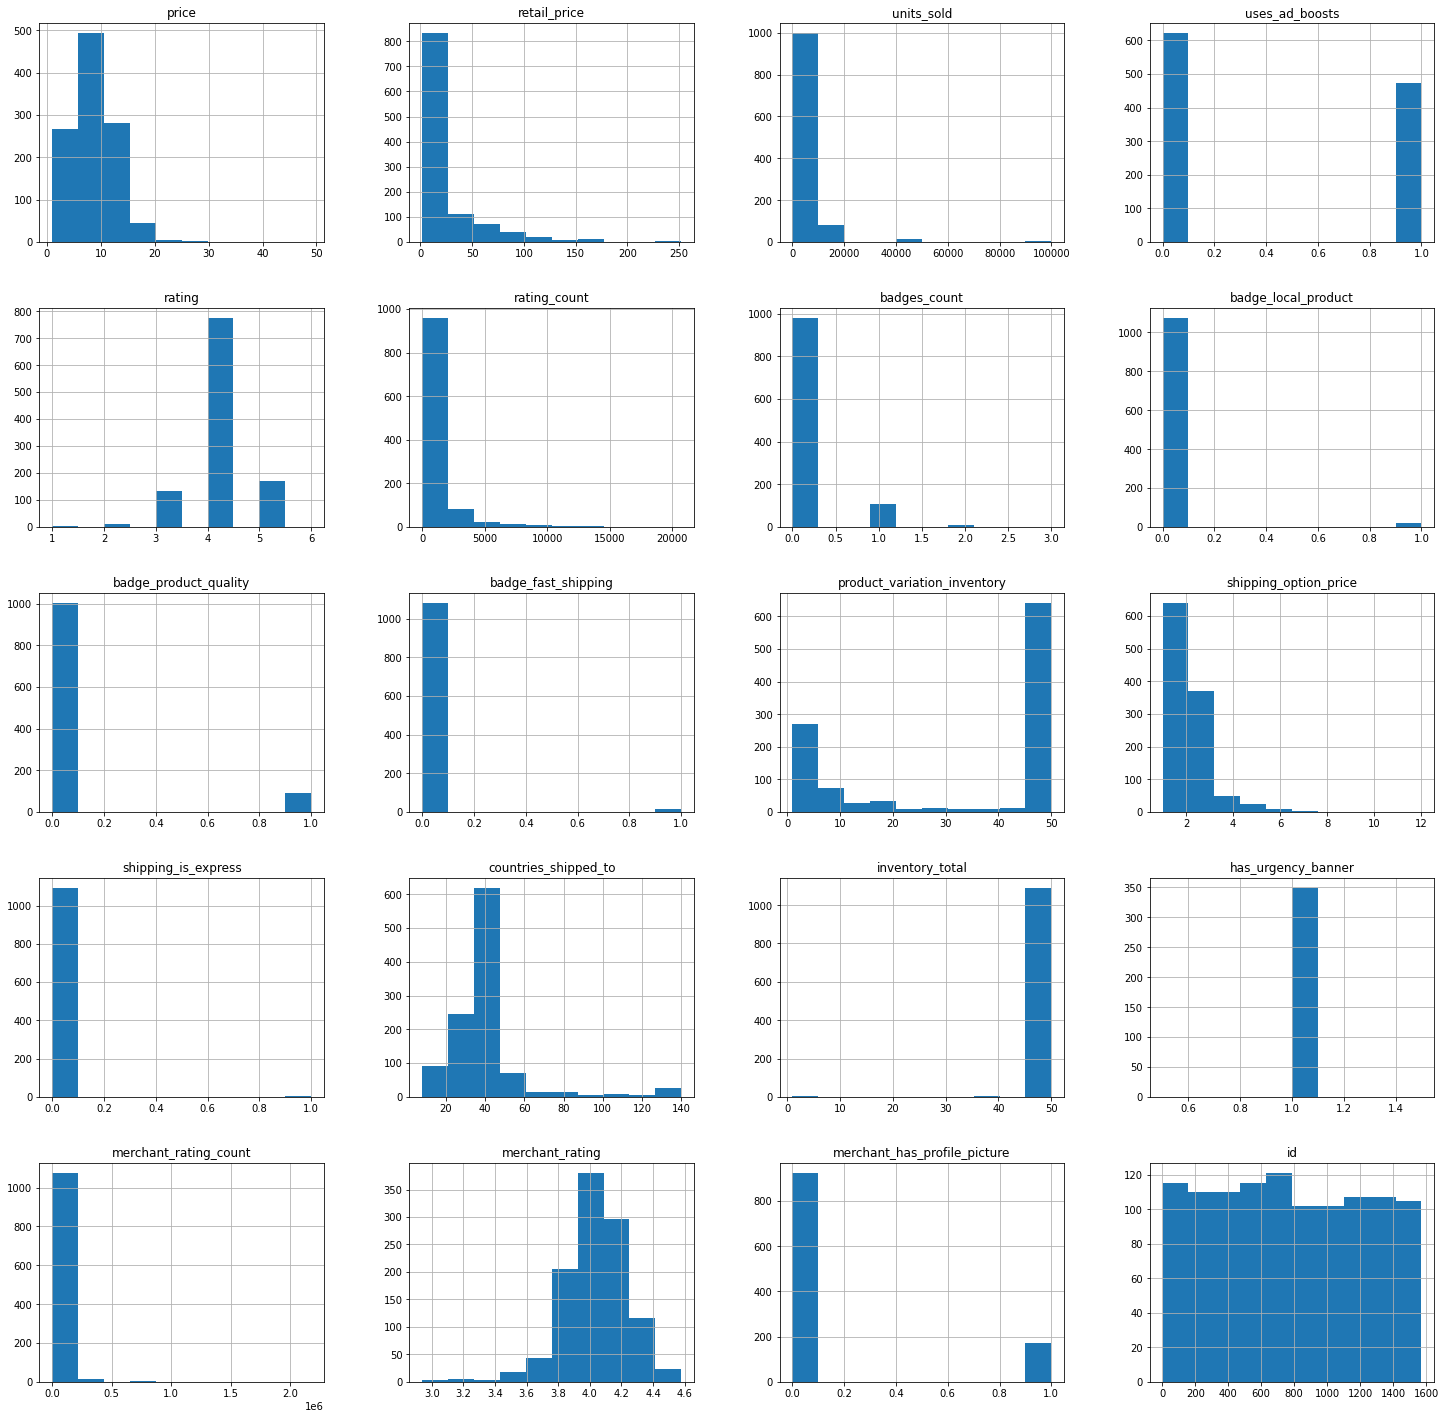

In [ ]:
df.hist(figsize=(25,25))

show the linear correlation between the columns

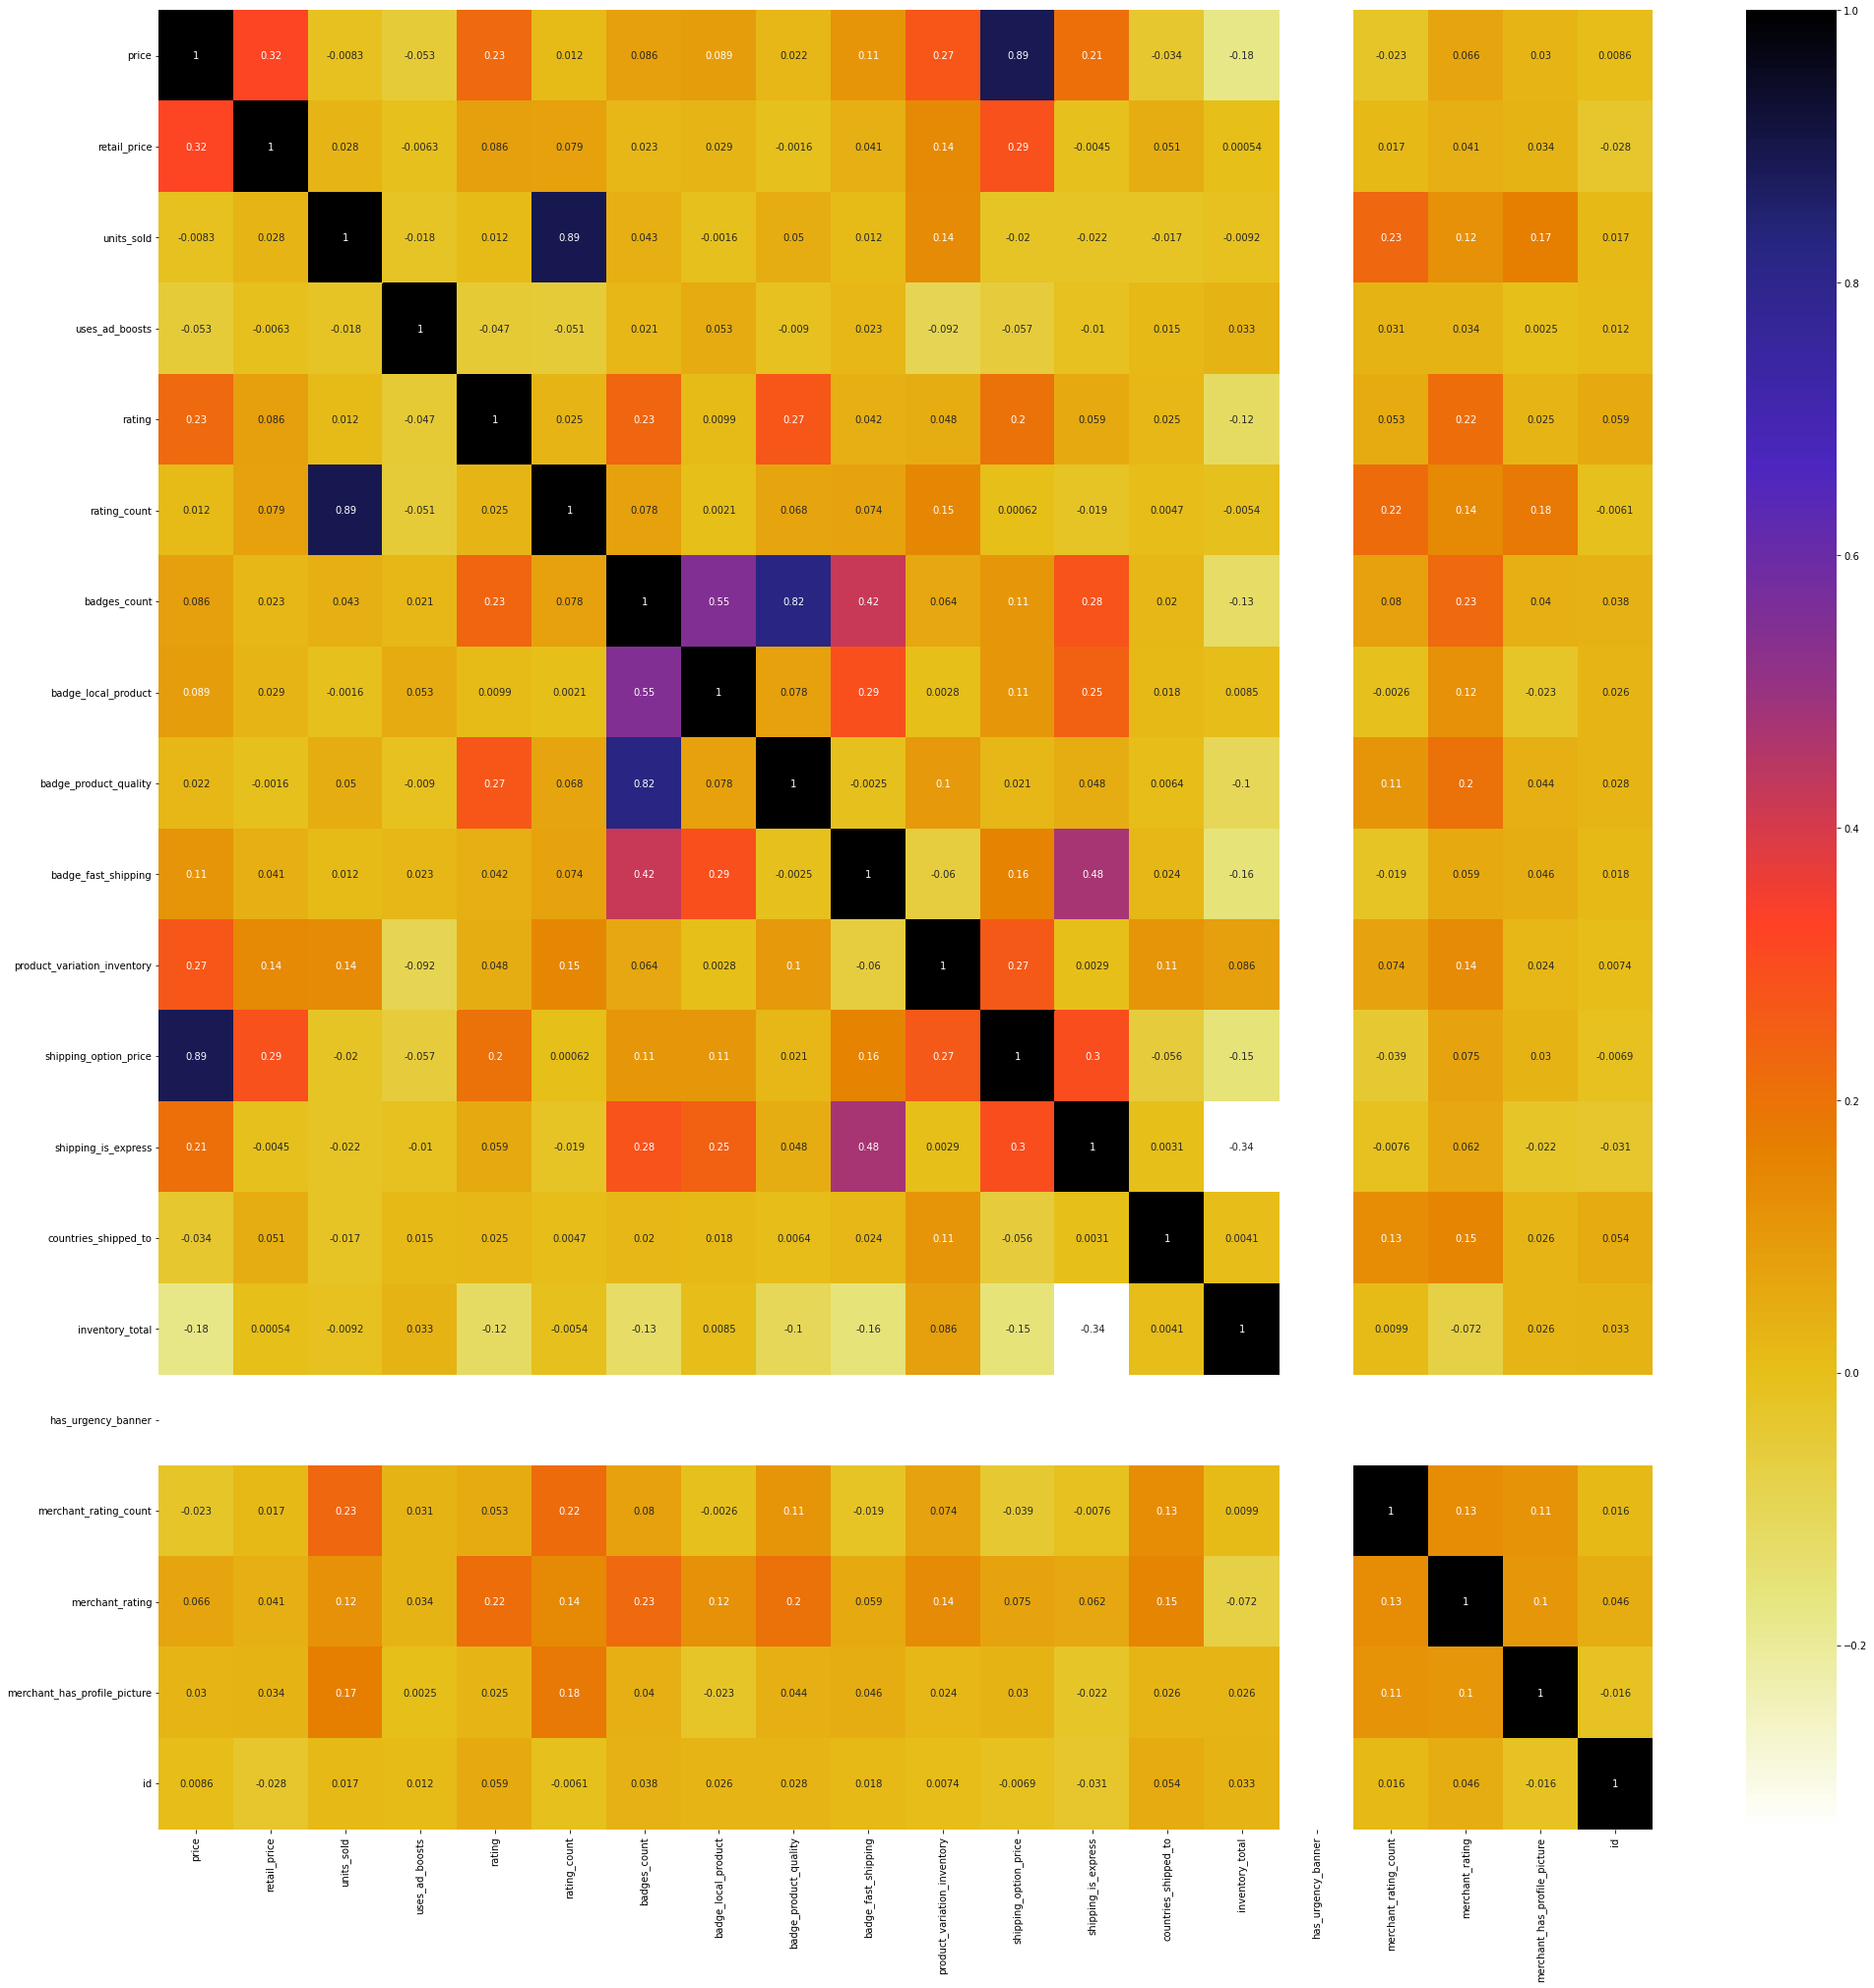

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(34,34))
corela=df.corr()
sns.heatmap(corela,annot=True,cmap=plt.cm.CMRmap_r)# using the heatmap to show the strenght between columns by color
plt.show()

# start cleaning the train data

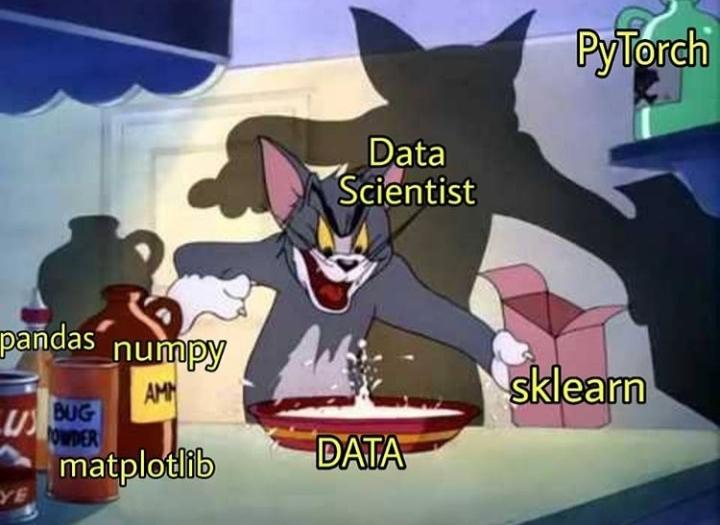

In [ ]:
df.drop_duplicates(inplace=True)

remove the outliers using Interquartile range

In [ ]:
s = df['rating'] #choose the column
q1 = s.quantile(0.25) #lower quartile
q3 = s.quantile(0.75) #highier quartile
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)]) #finding outliers
df=df.drop(outliers)

repeat the same steps on other columns

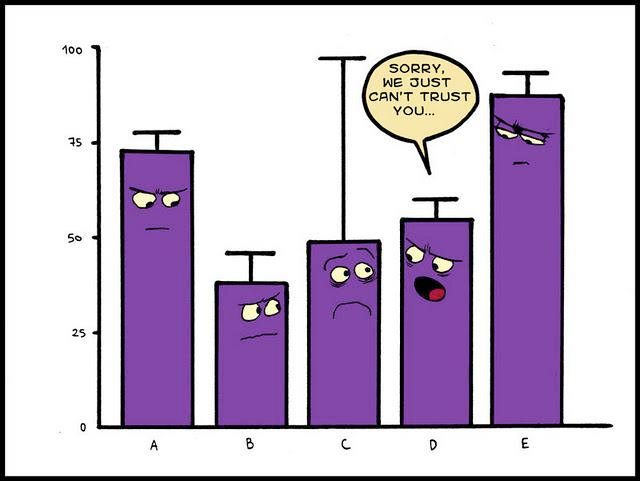

In [ ]:
s = df['countries_shipped_to']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])
df=df.drop(outliers)

In [ ]:
s = df['merchant_rating']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])
df=df.drop(outliers)

In [ ]:
s = df['shipping_option_price']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])


In [ ]:
s = df['merchant_rating_count']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])


In [ ]:
s = df['units_sold']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])


In [ ]:
s = df['rating_count']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])


In [ ]:
s = df['retail_price']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])

drop some columns that have low variance or low impact or have noise

In [ ]:
df=df.drop('urgency_text',axis=1) #chossing the column and axis =1 to remove column not row
df=df.drop('merchant_profile_picture',axis=1)
df=df.drop('tags',axis=1)
df=df.drop('id',axis=1)
df=df.drop('crawl_month',axis=1)
df=df.drop('theme',axis=1)
df=df.drop('currency_buyer',axis=1)
df=df.drop('merchant_title',axis=1)
df=df.drop('merchant_name',axis=1)
df=df.drop('merchant_info_subtitle',axis=1)
df=df.drop('merchant_id',axis=1)
df=df.drop('badge_local_product',axis=1)
df=df.drop('badge_product_quality',axis=1)
df=df.drop('badge_fast_shipping',axis=1)
df=df.drop('shipping_is_express',axis=1)
df=df.drop('merchant_has_profile_picture',axis=1)
df=df.drop('badges_count',axis=1)
df=df.drop('inventory_total',axis=1)
df=df.drop('shipping_option_name',axis=1)
df=df.drop('shipping_option_price',axis=1)
df=df.drop('has_urgency_banner',axis=1)
df=df.drop('origin_country',axis=1)
df=df.drop('countries_shipped_to',axis=1)


filling the missing value with zero

In [ ]:
df['has_urgency_banner']=df['has_urgency_banner'].fillna(0)

filling the missing data with the most common value in the column

In [ ]:
m=df['origin_country'].value_counts().idxmax() #count the  unique value and choose the highest one
df['origin_country']=df['origin_country'].fillna(m)

cleaning the size by replacing the strange values or wrong,
removing some rows ,
filling the missing data with the most common value in the column,
make all the values capital,then display the unique value to make sure that the column is clean

In [ ]:
wirds=['H01','26(Waist 72cm 28inch)','S(bust 88cm)','S.','29','choose a size','Base Coat','size S','Size S','s.','1','25-S','5PAIRS','35','Pack of 1','SIZE S','SIZE S','Size-S','25','S (waist58-62cm)','SIZE S','Suit-S','Size/S','S Pink','S..','Size S.','pants-S','US-S']
wirdm=['Size M','M.','100 x 100cm(39.3 x 39.3inch)','2pcs','S/M(child)','60','10 ml','X   L','Women Size 36','B','SizeL','10pcs','40 cm','1m by 3m','20pcs','33','One Size','20PCS-10PAIRS','2','30 cm','5','4-5 Years','100 cm','1pc','34','1 pc.']
wirdxs=['XS.','Size-XS','SIZE XS'] #butting all the values that we want to replace by size xs in one list to make it easy for us to replace them
wirdxxs=['Size-XXS','Size -XXS','SIZE XXS','SIZE-XXS','Size XXS']
df['product_variation_size_id']=df['product_variation_size_id'].replace('4XL','xxxxl')
df['product_variation_size_id']=df['product_variation_size_id'].replace('6XL','xxxxxxl')
df['product_variation_size_id']=df['product_variation_size_id'].replace('5XL','xxxxxl')
df['product_variation_size_id']=df['product_variation_size_id'].replace('2XL','xxl')
df['product_variation_size_id']=df['product_variation_size_id'].replace('Size4XL','xxxxl')
df['product_variation_size_id']=df['product_variation_size_id'].replace('Size-5XL','xxxxxl')
df['product_variation_size_id']=df['product_variation_size_id'].replace('04-3XL','xxxl')
df['product_variation_size_id']=df['product_variation_size_id'].replace('1 PC - XL','xl')
df['product_variation_size_id']=df['product_variation_size_id'].replace(wirds,'s')#replace the list of s by size s
df['product_variation_size_id']=df['product_variation_size_id'].replace(wirdm,'m')
df['product_variation_size_id']=df['product_variation_size_id'].replace(wirdxs,'xs')
df['product_variation_size_id']=df['product_variation_size_id'].replace(wirdxxs,'xxs')
#df=df.drop(999)# droping some rows  with strange values
#df=df.drop(955)
#df=df.drop(954)
#df=df.drop(571)
#df=df.drop(408)
df['product_variation_size_id']=df['product_variation_size_id'].str.upper() #tranforming them to capital
m=df['product_variation_size_id'].value_counts().idxmax()
df['product_variation_size_id']=df['product_variation_size_id'].fillna(m)
df['product_variation_size_id'].unique() #display the unique values in the column

array(['M', 'L', 'S', 'XS', 'XXS', 'XL', 'XXL', 'XXXS', 'XXXXL', 'XXXL',
       'XXXXXL'], dtype=object)

cleaning the color by replacing the strange values or wrong, removing some rows , filling the missing data with the most common value in the column, make all the values capital,then display the unique value to make sure that the column is clean

In [ ]:
df=df.drop(128)
df=df.drop(576)
#df=df.drop(779)
m=df['product_color'].value_counts().idxmax()
df['product_color']=df['product_color'].fillna(m)
colorgreen=['white & green','black & green','armygreen','mintgreen','lightgreen','darkgreen','Army green','light green','fluorescentgreen','applegreen','camouflage','army']
colorpink=['pink & black','pink & white','pink & grey','purple','rosered','rose','blue & pink','dustypink','Rose red','lightpink','floral','nude']
colorblue=['navyblue & white','black & blue','pink & blue','lakeblue','navyblue','lightblue','skyblue','navy','navy blue','kblue','darkblue','denimblue']
coloryellow=['black & yellow','brown & yellow','yellow','winered & yellow','lightyellow']
colorblack=['white & black','coffee','white & black','coolblack','blackwhite','silver']
colorwhite=['black & white','multicolor','star','whitestripe','lightred','offwhite','rainbow','whitefloral']
df['product_color']=df['product_color'].replace(colorblack,'black')
df['product_color']=df['product_color'].replace(colorwhite,'white')
df['product_color']=df['product_color'].replace('winered','red')
df['product_color']=df['product_color'].replace('orange-red','red')
df['product_color']=df['product_color'].replace('watermelonred','red')
df['product_color']=df['product_color'].replace('khaki','gray')
df['product_color']=df['product_color'].replace('leopardprint','brown')
df['product_color']=df['product_color'].replace('burgundy','red')
df['product_color']=df['product_color'].replace('beige','gray')
df['product_color']=df['product_color'].replace('lightgrey','gray')
df['product_color']=df['product_color'].replace('claret','red')
df['product_color']=df['product_color'].replace('ivory','gold')
df['product_color']=df['product_color'].replace('wine red','red')
df['product_color']=df['product_color'].replace('rosegold','gold')
df['product_color']=df['product_color'].replace('leopard','brown')
df['product_color']=df['product_color'].replace('lightgray','gray')
df['product_color']=df['product_color'].replace('wine','red')
df['product_color']=df['product_color'].replace(colorgreen,'green')
df['product_color']=df['product_color'].replace(colorpink,'pink')
df['product_color']=df['product_color'].replace(colorblue,'blue')
df['product_color']=df['product_color'].replace(coloryellow,'yellow')
df['product_color']=df['product_color'].replace('camel','orange')
df['product_color']=df['product_color'].replace('apricot','orange')
df['product_color']=df['product_color'].replace('grey','gray')
df['product_color']=df['product_color'].str.upper()
df['product_color'].unique()
#df['product_color'].str.match('&')

array(['YELLOW', 'BLACK', 'WHITE', 'BROWN', 'RED', 'BLUE', 'GREEN',
       'PINK', 'GRAY', 'ORANGE', 'VIOLET', 'GOLD'], dtype=object)

display the remaning columns

In [ ]:
df.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'merchant_rating_count',
       'merchant_rating'],
      dtype='object')

make  sure the column is clean

In [ ]:
df['product_color'].unique()

array(['YELLOW', 'BLACK', 'WHITE', 'BROWN', 'RED', 'BLUE', 'GREEN',
       'PINK', 'GRAY', 'ORANGE', 'VIOLET', 'GOLD'], dtype=object)

encode the categoregal columns by label or one hot encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
en=LabelEncoder()
onehot=OneHotEncoder()
df['product_variation_size_id']=en.fit_transform(df['product_variation_size_id'])
df['uses_ad_boosts']=en.fit_transform(df['uses_ad_boosts'])
df['product_color']=en.fit_transform(df['product_color'])
df['shipping_option_name']=en.fit_transform(df['shipping_option_name'])
df['origin_country']=en.fit_transform(df['origin_country'])
df['origin_country'].value_counts()

make sure that there is no column contain null value

In [ ]:
df.isna().any()

price                          False
retail_price                   False
units_sold                     False
uses_ad_boosts                 False
rating                         False
rating_count                   False
product_color                  False
product_variation_size_id      False
product_variation_inventory    False
merchant_rating_count          False
merchant_rating                False
dtype: bool

split the train data into x and y where is the target column

In [ ]:
x_train=df.loc[:, df.columns != 'rating']

In [ ]:
y_train=df.loc[:,'rating']

load the test data

In [ ]:
from numpy.ma.core import shape
df2 = pd.read_csv('test_new.csv')
df2.shape

(479, 33)

save the id before remove the column

In [ ]:
_id=df2['id']

In [ ]:
df2.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
count,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,124.0,479.000000,479.000000,479.000000,479.000000
mean,8.335846,22.321503,3928.682672,0.434238,830.586639,0.085595,0.016701,0.054280,0.014614,33.707724,2.346555,0.002088,40.392484,49.757829,1.0,25837.699374,4.023561,0.116910,817.501044
std,3.708964,26.773515,8179.915708,0.496175,1856.340336,0.321771,0.128284,0.226806,0.120126,21.128372,0.977222,0.045691,20.560057,2.742776,0.0,57241.300129,0.214374,0.321649,454.150616
min,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000,2.000000,1.0,0.000000,2.333333,0.000000,0.000000
25%,5.790000,7.000000,100.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2.000000,0.000000,31.000000,50.000000,1.0,2091.000000,3.914894,0.000000,410.500000
50%,8.000000,10.000000,1000.000000,0.000000,158.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7363.000000,4.032956,0.000000,863.000000
75%,11.000000,26.000000,5000.000000,1.000000,856.000000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,27175.000000,4.155606,0.000000,1214.500000
max,20.000000,168.000000,100000.000000,1.000000,17980.000000,3.000000,1.000000,1.000000,1.000000,50.000000,7.000000,1.000000,140.000000,50.000000,1.0,839882.000000,5.000000,1.000000,1568.000000


# cleaning the test data

same as the train data but without removing rows

In [ ]:
df2=df2.drop('urgency_text',axis=1)
df2=df2.drop('merchant_profile_picture',axis=1)
df2=df2.drop('tags',axis=1)
df2=df2.drop('id',axis=1)
df2=df2.drop('crawl_month',axis=1)
df2=df2.drop('theme',axis=1)
df2=df2.drop('currency_buyer',axis=1)
df2=df2.drop('merchant_title',axis=1)
df2=df2.drop('merchant_name',axis=1)
df2=df2.drop('merchant_info_subtitle',axis=1)
df2=df2.drop('merchant_id',axis=1)
df2=df2.drop('badge_local_product',axis=1)
df2=df2.drop('badge_product_quality',axis=1)
df2=df2.drop('badge_fast_shipping',axis=1)
df2=df2.drop('shipping_is_express',axis=1)
df2=df2.drop('merchant_has_profile_picture',axis=1)
df2=df2.drop('badges_count',axis=1)
df2=df2.drop('inventory_total',axis=1)
df2=df2.drop('shipping_option_name',axis=1)
df2=df2.drop('shipping_option_price',axis=1)
df2=df2.drop('has_urgency_banner',axis=1)
df2=df2.drop('origin_country',axis=1)
df2=df2.drop('countries_shipped_to',axis=1)

In [ ]:
df2['has_urgency_banner']=df2['has_urgency_banner'].fillna(0)
df2

,price,retail_price,units_sold,uses_ad_boosts,rating_count,product_color,product_variation_size_id,product_variation_inventory,merchant_rating_count,merchant_rating
0,5.75,5,10,1,0,white,XS,5,3,2.333333
1,7.00,7,5000,0,579,black,XS,50,4213,4.058391
2,5.00,16,1000,1,62,blue,XS,20,10501,4.029235
3,18.00,27,5000,1,1903,blue,M,50,15855,4.052917
4,12.00,81,20000,0,1799,white,M,50,151914,4.127921
...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,100,1,27,black,M,50,572,3.367133
475,6.00,17,5000,1,817,blue,XXS,1,50864,4.079644
476,4.83,51,50,1,1,white,XS,3,57,3.824561
477,3.00,3,100,1,8,black,M,3,1086,4.056169


In [ ]:
m=df2['origin_country'].value_counts().idxmax()
df2['origin_country']=df2['origin_country'].fillna(m)

In [ ]:
wirds=['H01','26(Waist 72cm 28inch)','S(bust 88cm)','S(Pink & Black)','S.','S Diameter 30cm','Size--S','29','choose a size','Base Coat','size S','Size S','s.','1','25-S','5PAIRS','35','Pack of 1','SIZE S','SIZE S','Size-S','25','S (waist58-62cm)','SIZE S','Suit-S','Size/S','S Pink','S..','Size S.','pants-S','US-S']
wirdm=['Size M','M.','daughter 24M','4','100 x 100cm(39.3 x 39.3inch)','2pcs','S/M(child)','60','10 ml','X   L','Women Size 36','B','SizeL','10pcs','40 cm','1m by 3m','20pcs','33','One Size','20PCS-10PAIRS','2','30 cm','5','4-5 Years','100 cm','1pc','34','1 pc.']
wirdxs=['XS.','Size-XS','SIZE XS','first  generation','80 X 200 CM','EU 35','100pcs','Women Size 37','US 6.5 (EU 37)','EU39(US8)']
wirdxxs=['Size-XXS','Size -XXS','SIZE XXS','SIZE-XXS','Size XXS','AU plug Low quality', '3 layered anklet','17','US5.5-EU35','36']
df2['product_variation_size_id']=df2['product_variation_size_id'].replace('4XL','xxxxl')
df2['product_variation_size_id']=df2['product_variation_size_id'].replace('3XL','xxxl')
df2['product_variation_size_id']=df2['product_variation_size_id'].replace('6XL','xxxxxxl')
df2['product_variation_size_id']=df2['product_variation_size_id'].replace('5XL','xxxxxl')
df2['product_variation_size_id']=df2['product_variation_size_id'].replace('SIZE-4XL','xxxxl')
df2['product_variation_size_id']=df2['product_variation_size_id'].replace('L.','l')
df2['product_variation_size_id']=df2['product_variation_size_id'].replace('2XL','xxl')
df2['product_variation_size_id']=df2['product_variation_size_id'].replace('Size-5XL','xxxxxl')
df2['product_variation_size_id']=df2['product_variation_size_id'].replace('04-3XL','xxxl')
df2['product_variation_size_id']=df2['product_variation_size_id'].replace('1 PC - XL','xl')
df2['product_variation_size_id']=df2['product_variation_size_id'].replace('32/L','l')
df2['product_variation_size_id']=df2['product_variation_size_id'].replace('Size-L','l')
df2['product_variation_size_id']=df2['product_variation_size_id'].replace(wirds,'s')
df2['product_variation_size_id']=df2['product_variation_size_id'].replace(wirdm,'m')
df2['product_variation_size_id']=df2['product_variation_size_id'].replace(wirdxs,'xs')
df2['product_variation_size_id']=df2['product_variation_size_id'].replace(wirdxxs,'xxs')
df2['product_variation_size_id']=df2['product_variation_size_id'].str.upper()
m=df2['product_variation_size_id'].value_counts().idxmax()
df2['product_variation_size_id']=df2['product_variation_size_id'].fillna(m)
df2['product_variation_size_id'].unique()

array(['XS', 'M', 'XXS', 'S', 'L', 'XL', 'XXXL', 'XXXXXL', 'XXXXL', 'XXL',
       'XXXS'], dtype=object)

In [ ]:
m=df2['product_color'].value_counts().idxmax()
df2['product_color']=df2['product_color'].fillna(m)
colorgreen=['white & green','black & green','armygreen','mintgreen','lightgreen','darkgreen','Army green','light green','fluorescentgreen','applegreen','camouflage','army']
colorpink=['pink & black','pink & white','pink & grey','purple','rosered','rose','blue & pink','dustypink','Rose red','lightpink','floral','nude']
colorblue=['navyblue & white','black & blue','pink & blue','lakeblue','navyblue','lightblue','skyblue','navy','navy blue','kblue','darkblue','denimblue']
coloryellow=['black & yellow','brown & yellow','yellow','winered & yellow','lightyellow']
colorblack=['white & black','coffee','white & black','coolblack','blackwhite','silver']
colorwhite=['black & white','multicolor','star','whitestripe','lightred','offwhite','rainbow','whitefloral']
df2['product_color']=df2['product_color'].replace(colorblack,'black')
df2['product_color']=df2['product_color'].replace(colorwhite,'white')
df2['product_color']=df2['product_color'].replace('winered','red')
df2['product_color']=df2['product_color'].replace('orange-red','red')
df2['product_color']=df2['product_color'].replace('watermelonred','red')
df2['product_color']=df2['product_color'].replace('khaki','gray')
df2['product_color']=df2['product_color'].replace('leopardprint','brown')
df2['product_color']=df2['product_color'].replace('burgundy','red')
df2['product_color']=df2['product_color'].replace('beige','gray')
df2['product_color']=df2['product_color'].replace('lightgrey','gray')
df2['product_color']=df2['product_color'].replace('claret','red')
df2['product_color']=df2['product_color'].replace('ivory','gold')
df2['product_color']=df2['product_color'].replace('wine red','red')
df2['product_color']=df2['product_color'].replace('rosegold','gold')
df2['product_color']=df2['product_color'].replace('leopard','brown')
df2['product_color']=df2['product_color'].replace('lightgray','gray')
df2['product_color']=df2['product_color'].replace('wine','red')
df2['product_color']=df2['product_color'].replace(colorgreen,'green')
df2['product_color']=df2['product_color'].replace(colorpink,'pink')
df2['product_color']=df2['product_color'].replace(colorblue,'blue')
df2['product_color']=df2['product_color'].replace(coloryellow,'yellow')
df2['product_color']=df2['product_color'].replace('camel','orange')
df2['product_color']=df2['product_color'].replace('apricot','orange')
df2['product_color']=df2['product_color'].replace('grey','gray')
df2['product_color']=df2['product_color'].str.upper()
#df['product_color'].str.match('&')

In [ ]:
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
en=LabelEncoder()
onehot=OneHotEncoder()
df2['product_variation_size_id']=en.fit_transform(df2['product_variation_size_id'])
df2['uses_ad_boosts']=en.fit_transform(df2['uses_ad_boosts'])
df2['product_color']=en.fit_transform(df2['product_color'])
df2['shipping_option_name']=en.fit_transform(df2['shipping_option_name'])
df2['origin_country']=en.fit_transform(df2['origin_country'])
df2['origin_country'].value_counts()

spilt the test data to x only

In [ ]:
X_test = df2
df2.shape

(479, 10)

In [ ]:
#when i used the normalization the accuracy dropped so i did not use it
from sklearn.preprocessing import StandardScaler
x_train_norm =StandardScaler().fit_transform(x_train)
x_test_norm = StandardScaler().fit_transform(X_test)

# building differnt models

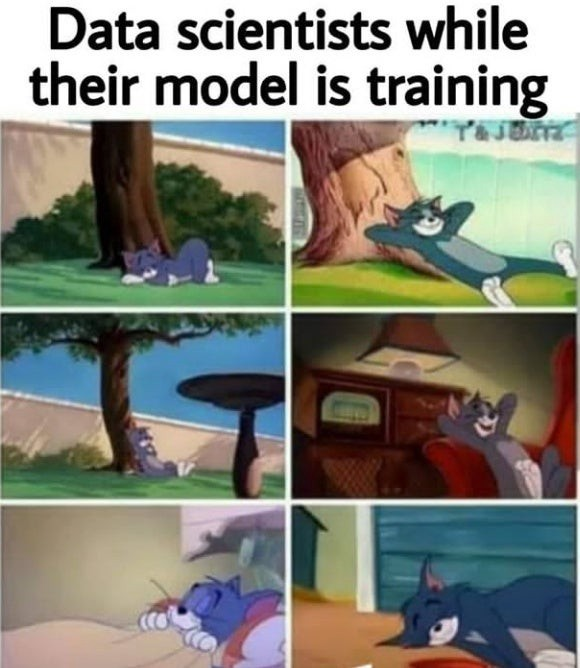

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier()
#decision tree by grid search
#Apply hyper parameter tuning
dt_param_grid = [{'criterion': ['gini', 'entropy'],'max_depth': list(range(4,13,2))}]
classifier_dt = GridSearchCV(dt, dt_param_grid, cv=10)
best_dt = classifier_dt.fit(x_train,y_train).best_estimator_
pred_dt = best_dt.predict(X_test)

In [ ]:
best_dt = dt.fit(x_train,y_train) #tring without grid search
pred_dt = best_dt.predict(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB #import the necessary libraries
from sklearn.model_selection import GridSearchCV
nb_classifier = GaussianNB()
import numpy as np
#naive bayes with grid search
#Apply hyper parameter tuning
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
classifier_NB = GridSearchCV(estimator=nb_classifier, param_grid = params_NB)
best_NB = classifier_NB.fit(x_train, y_train).best_estimator_
pred_nb = best_NB.predict(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
#svm with grid search
svm = SVC()
svm_param_grid = {'C': [0.01, 0.1, 1, 10],'kernel': ['poly', 'rbf','sigmoid'],'degree': list(range(1,5))}
classifier_svm = GridSearchCV(svm, svm_param_grid, cv=10)
best_svm = classifier_svm.fit(x_train,y_train).best_estimator_
pred_svm = best_svm.predict(X_test)

In [ ]:
#svm without grid search
from sklearn.svm import SVC
svm = SVC(C=0.1,kernel='poly')
best_svm = svm.fit(x_train_norm,y_train)
pred_svm = best_svm.predict(x_test_norm)

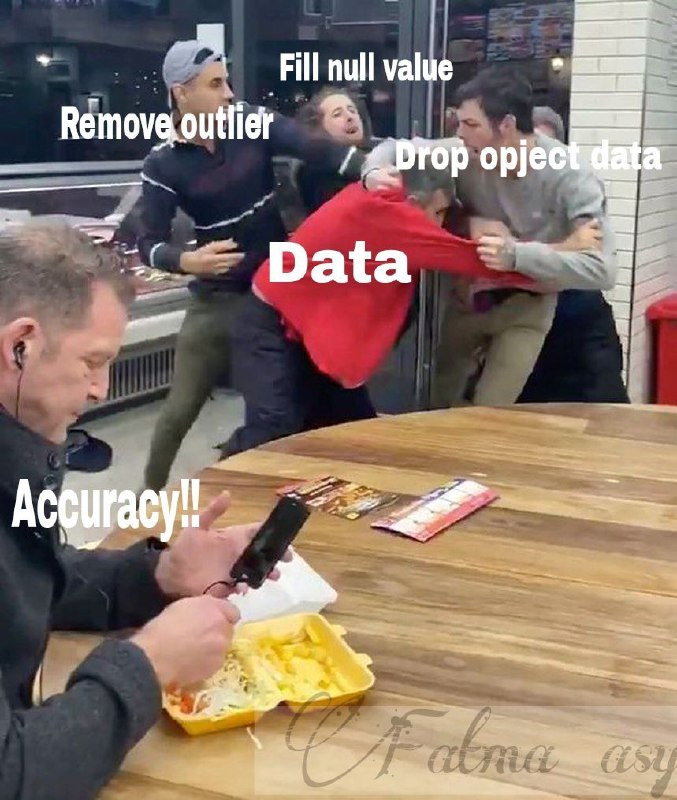

save the output in new file csv on my drive

In [ ]:
import numpy as np
pred_df = pd.DataFrame(data={'id':np.asarray(_id),'rating':pred_dt})
pred_df.to_csv('pred_walkthrough.csv', index=False)

1-Why Data Mining is a misnomer? What is another preferred name?
answer:The term "data mining" is a misnomer, not the extraction of data itself, because the goal is the extraction of patterns and knowledge from large amounts of data, ,we get the data from collecting
knowledge mining
Knowledge discovery
knowledge extraction, data analysis, data
archeology, data dredging, information harvesting,
business intelligence






2-What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?
answer:The knowledge discovery process (KDD). It is defined. seeks new knowledge in some application  first be integrate the data from different resources and clean it then put it inside data warehouse which is very important then we decide the goal and then we select the data from the warehouse that serve or we need for that goal which called task relevant data then we start the data mining and evaluate the model to extact knowledge and we get feedback and start the process all over again.
Data engineers: are the ones that prepare the data from raw data  may include human or machine errors to solve business problems and mantain the data warehouse and itegration of the data in KDD process
Data Scientist: works on the data provided by the data engineer. data scientist is dependent on a data engineer.  his role starts from the selection and task relevant data

3-In data mining, what is the difference between prediction and categorization?
prediction : is about predicting a missing/unknown element(continuous value) of a dataset
categorization:is a common technique that separates data points into different classes. It allows you to organize data sets of all sorts, including complex and large datasets as well as small and simple ones.

4-Why data science/machine learning is a bad idea in the context of information security?
because the model only learn from the data ,it bick up  from the data so if you eat piosion data your behavior will be controlled by attackers if the data even baised towards certain group of people or features or factors then the result will inherate that baised ,is data driven solution so if there is any bais or ethical issue that involved in the dataset then the model will be baised which make it easy for attackers so it break the information security

5-What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?
Confidentiality is roughly equivalent to Confidentiality measures are designed to prevent sensitive information from unauthorized access attempts
Integrity involves maintaining the consistency, accuracy and trustworthiness of data over its entire lifecycle
Availability means information should be consistently and readily accessible for authorized parties
first by ML adsversial samples by breaking system integrityby manipulating the behavior of the system on the client side by using some fake samples we tric the model
second backdoor attack we change the data by adding noise
third information Leak Model is solely evaluated based on testing performance metric before release we only care about the accuracy but what else did the model captures in the data can be recovered by attackers
 Reconstruct original training data
 Stealing Neural Networks
 Membership Inference
 we break the three priciple of CIA so we can see the ascepts of how the model could we triced by attackers


 Problem Formulation:
 we have a certain company sells online products we want to build a model that predict the product ratings given some input features as the price the unit sold and other
 the function is classification we had a lot of challeges with the data beacause it contains a lot of missing values ,noise data ,wrong data and outliers that need to be handled
 when we build a good model that can predict the rating it will help  the company to enhance thier service and product which enhance thier outcomes doing this by f1 score this score takes both false positives  which is When actual rating is 3 for example and predicted rate is 2 and false negatives which is When actual rating is 2 but predicted rate is 3 into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution

i did not use cross validation or hold out method i just read the data and tried to clean it by doing some preprocessing and then doing ithe exact same thing on the test data and split the train and test data try different models with different hyperparameters save the scv file and see the accuracy
i dropped some useless columns ,removed outliers ,handled some wrong values in columns ,try normalization , fill the missing values and encode the categorical columns
i got the best solution when i used the decision tree with grid search when i tried different medels with different hyperparameters the accuracy dropped so it was the best solution from building the model even if i used decision tree without grid search the accuracy dropped

when i tried to reduce the number of columns that i dropped or used the normalized data or remove to many rowrs the accuracy dropped